**Importing**


In [17]:
!pip install matplotlib
!pip install matplotlib deap
import random
import numpy
from deap import base, creator, tools, algorithms
from matplotlib import pyplot as plt

**Defining**

In [18]:
num_location = 9
location = []
for i in range(num_location):
  location.append((random.randint(0 , 100) ,random.randint(0 , 100)))
depot = (45,60)
num_vehicles = 3
#Printing The Locations
location

[(16, 25),
 (83, 7),
 (96, 37),
 (66, 54),
 (37, 13),
 (58, 88),
 (57, 98),
 (32, 7),
 (81, 8)]

**Initializing The creator**

In [19]:
creator.create("FitnessMin", base.Fitness , weights = (-1.0 , -1.0))#adding 2 minus one cause we have two factors to look total distance and std
creator.create("Individual", list , fitness = creator.FitnessMin )

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


**Initializing The Toolbox**

In [20]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_location), num_location)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list , toolbox.individual)

**Eval Function**

In [21]:
# Fitness Function
def evalVRP(individual):

    total_distance = 0
    distances = []  # This will store the distance traveled by each vehicle

    for i in range(num_vehicles):
        vehicle_route = []
        vehicle_route.append(depot)

        for j in range(i, len(individual), num_vehicles):
            vehicle_route.append(location[individual[j]])
        vehicle_route.append(depot)
        vehicle_distance = 0

        for k in range(len(vehicle_route) - 1):
            current_location = numpy.array(vehicle_route[k])
            next_location = numpy.array(vehicle_route[k + 1])
            distance = numpy.linalg.norm(next_location - current_location)
            vehicle_distance += distance

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = numpy.std(distances)
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)


In [22]:
toolbox.register("mate", tools.cxOrdered )
toolbox.register("mutate", tools.mutShuffleIndexes ,indpb=0.05 )
toolbox.register("select", tools.selTournament, tournsize=10)

**Plotting**

In [23]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in location:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [location[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

**Main Function**

gen	nevals	avg    	min    
0  	300   	326.493	1.33621
1  	234   	298.942	1.07467
2  	224   	289.256	1.5831 
3  	216   	276.916	1.58899
4  	233   	268.05 	2.77322
5  	230   	246.485	6.36969
6  	225   	229.387	3.86015
7  	212   	213.96 	6.6467 
8  	216   	222.044	3.86015
9  	211   	213.366	8.11796
10 	204   	209.752	8.11796
11 	234   	209.649	6.43784
12 	219   	208.948	5.61356
13 	241   	207.285	5.61356
14 	237   	208.909	8.19006
15 	228   	209.548	8.19006
16 	219   	208.399	11.3411
17 	221   	209.274	8.19006
18 	218   	206.751	6.78112
19 	236   	208.777	9.39367
20 	221   	208.516	14.5949
21 	237   	208.134	5.61356
22 	225   	206.113	11.3411
23 	241   	206.799	11.3411
24 	226   	209.101	4.78874
25 	231   	210.68 	5.61356
26 	231   	211.019	5.61356
27 	222   	207.216	11.3411
28 	216   	211.721	8.01913
29 	222   	208.378	11.3411
30 	231   	208.914	8.19006
31 	212   	209.002	16.5388
32 	219   	207.83 	14.5949
33 	222   	207.83 	4.54119
34 	214   	206.719	14.802 
35 	222   	207.086	5.61356
3

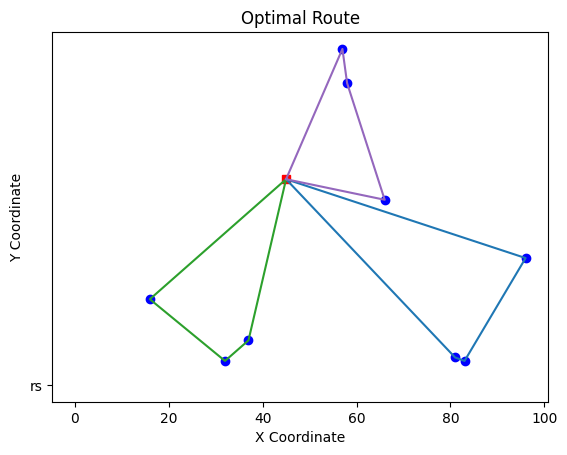

In [25]:
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 100, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
  main()